In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import time
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter

# Exploratory Data Analysis (EDA)

In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_test.csv')

In [ ]:
y_train = y_train.values.reshape(-1, )
y_test = y_test.values.reshape(-1, )

In [40]:
acc = []
balanced_acc = []
precision = []
recall = []
f1 = []
time_to_train = []
time_to_predict = []

#Method

##Resampling

In [7]:
# UnderSampling
nm = NearMiss(sampling_strategy=1e-5)
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7799999, 1: 78})


In [8]:
# OverSampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7799999, 1: 7799999})


## Logistic Regression

In [37]:
start_time = time.time()
logisticregression = LogisticRegression(random_state=0)
logisticregression.fit(X_res, y_res)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(logisticregression, '/content/drive/MyDrive/Anomaly_Detection/Files/model/LogisticRegression_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/LogisticRegression_resampling.joblib']

In [38]:
start_time = time.time()
y_pred = logisticregression.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[5045797, 1003800],
       [      7,      23]])

In [41]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [42]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

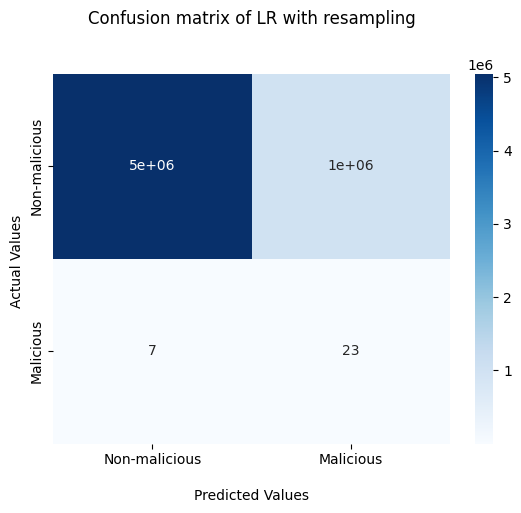

In [39]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of LR with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## Decision Tree

In [43]:
start_time = time.time()
decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_res, y_res)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(decisiontree, '/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_resampling.joblib']

In [44]:
start_time = time.time()
y_pred = decisiontree.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[2834158, 3215439],
       [     15,      15]])

In [45]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [46]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

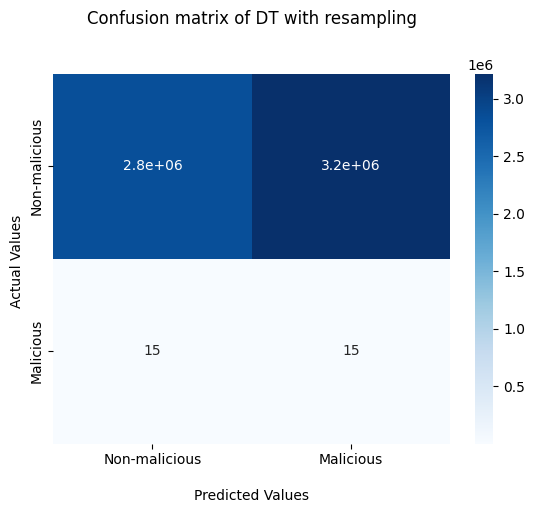

In [47]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of DT with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## SGD Classifier

In [48]:
start_time = time.time()
sgd = SGDClassifier()
sgd.fit(X_res, y_res)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(sgd, '/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_resampling.joblib']

In [49]:
start_time = time.time()
y_pred = sgd.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[5224050,  825547],
       [      9,      21]])

In [50]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [51]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

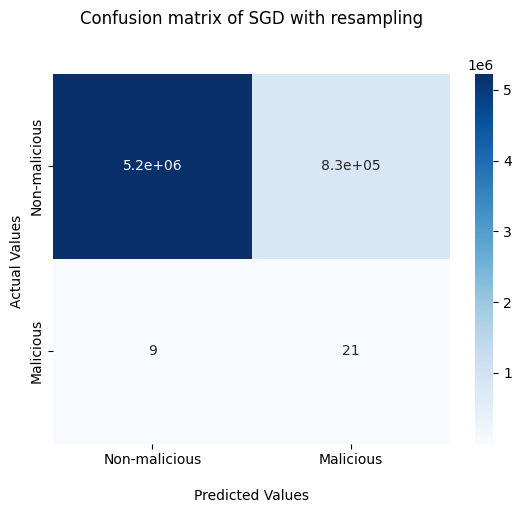

In [52]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of SGD with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## MLP Classifier

In [19]:
start_time = time.time()
mlp = MLPClassifier(random_state=1)
mlp.fit(X_res, y_res)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(mlp, '/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_resampling.joblib']

In [20]:
start_time = time.time()
y_pred = mlp.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[4521438, 1528159],
       [     11,      19]])

In [21]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [22]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

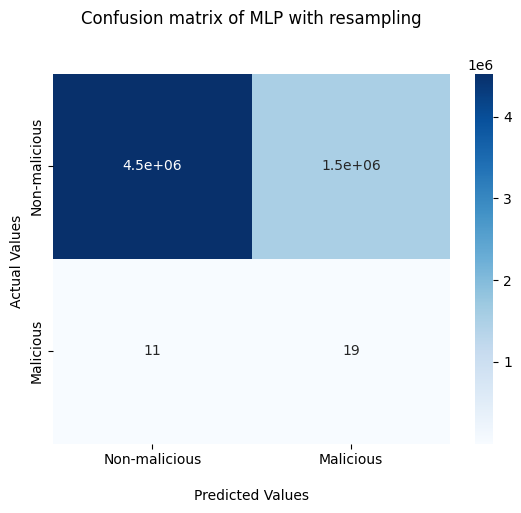

In [23]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of MLP with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()